# Assignment

In [28]:
%pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [29]:
# General imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, LeaveOneOut
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample


In [30]:
# Merge the datasets
df1 = pd.read_csv('Data_Class_1.csv')
df2 = pd.read_csv('Data_Class_3.csv')
df3 = pd.read_csv('Data_Class_4.csv')

# Concatenate the 3 datasets 
df = pd.concat([df1, df2, df3], ignore_index=True)

# Print the first lines of the final dataset
print(df.head())

# Verify number of lines and columns of dataset
total_lines, total_columns = df.shape

# Print the total number of lines
print(f"Total number of lines is: {total_lines}")

# Export Final CSV
df.to_csv('dataset.csv', index=False)


   Id  Altitude  Slope_Orientation  Slope  Horizontal_Distance_To_Water  \
0  41      2699                347      3                             0   
1  52      2739                323     25                            85   
2  53      2696                 72      2                            30   
3  56      2722                315     24                            30   
4  68      2919                 13     13                            90   

   Vertical_Distance_To_Water  Horizontal_Distance_To_Roadways  \
0                           0                             2096   
1                          43                             3118   
2                           0                             3271   
3                          19                             3216   
4                           6                             5321   

   Shadow_Index_9h  Shadow_Index_12h  Shadow_Index_15h  \
0              213               234               159   
1              149               205

## Exploratory Analisys



<Figure size 1500x1000 with 0 Axes>

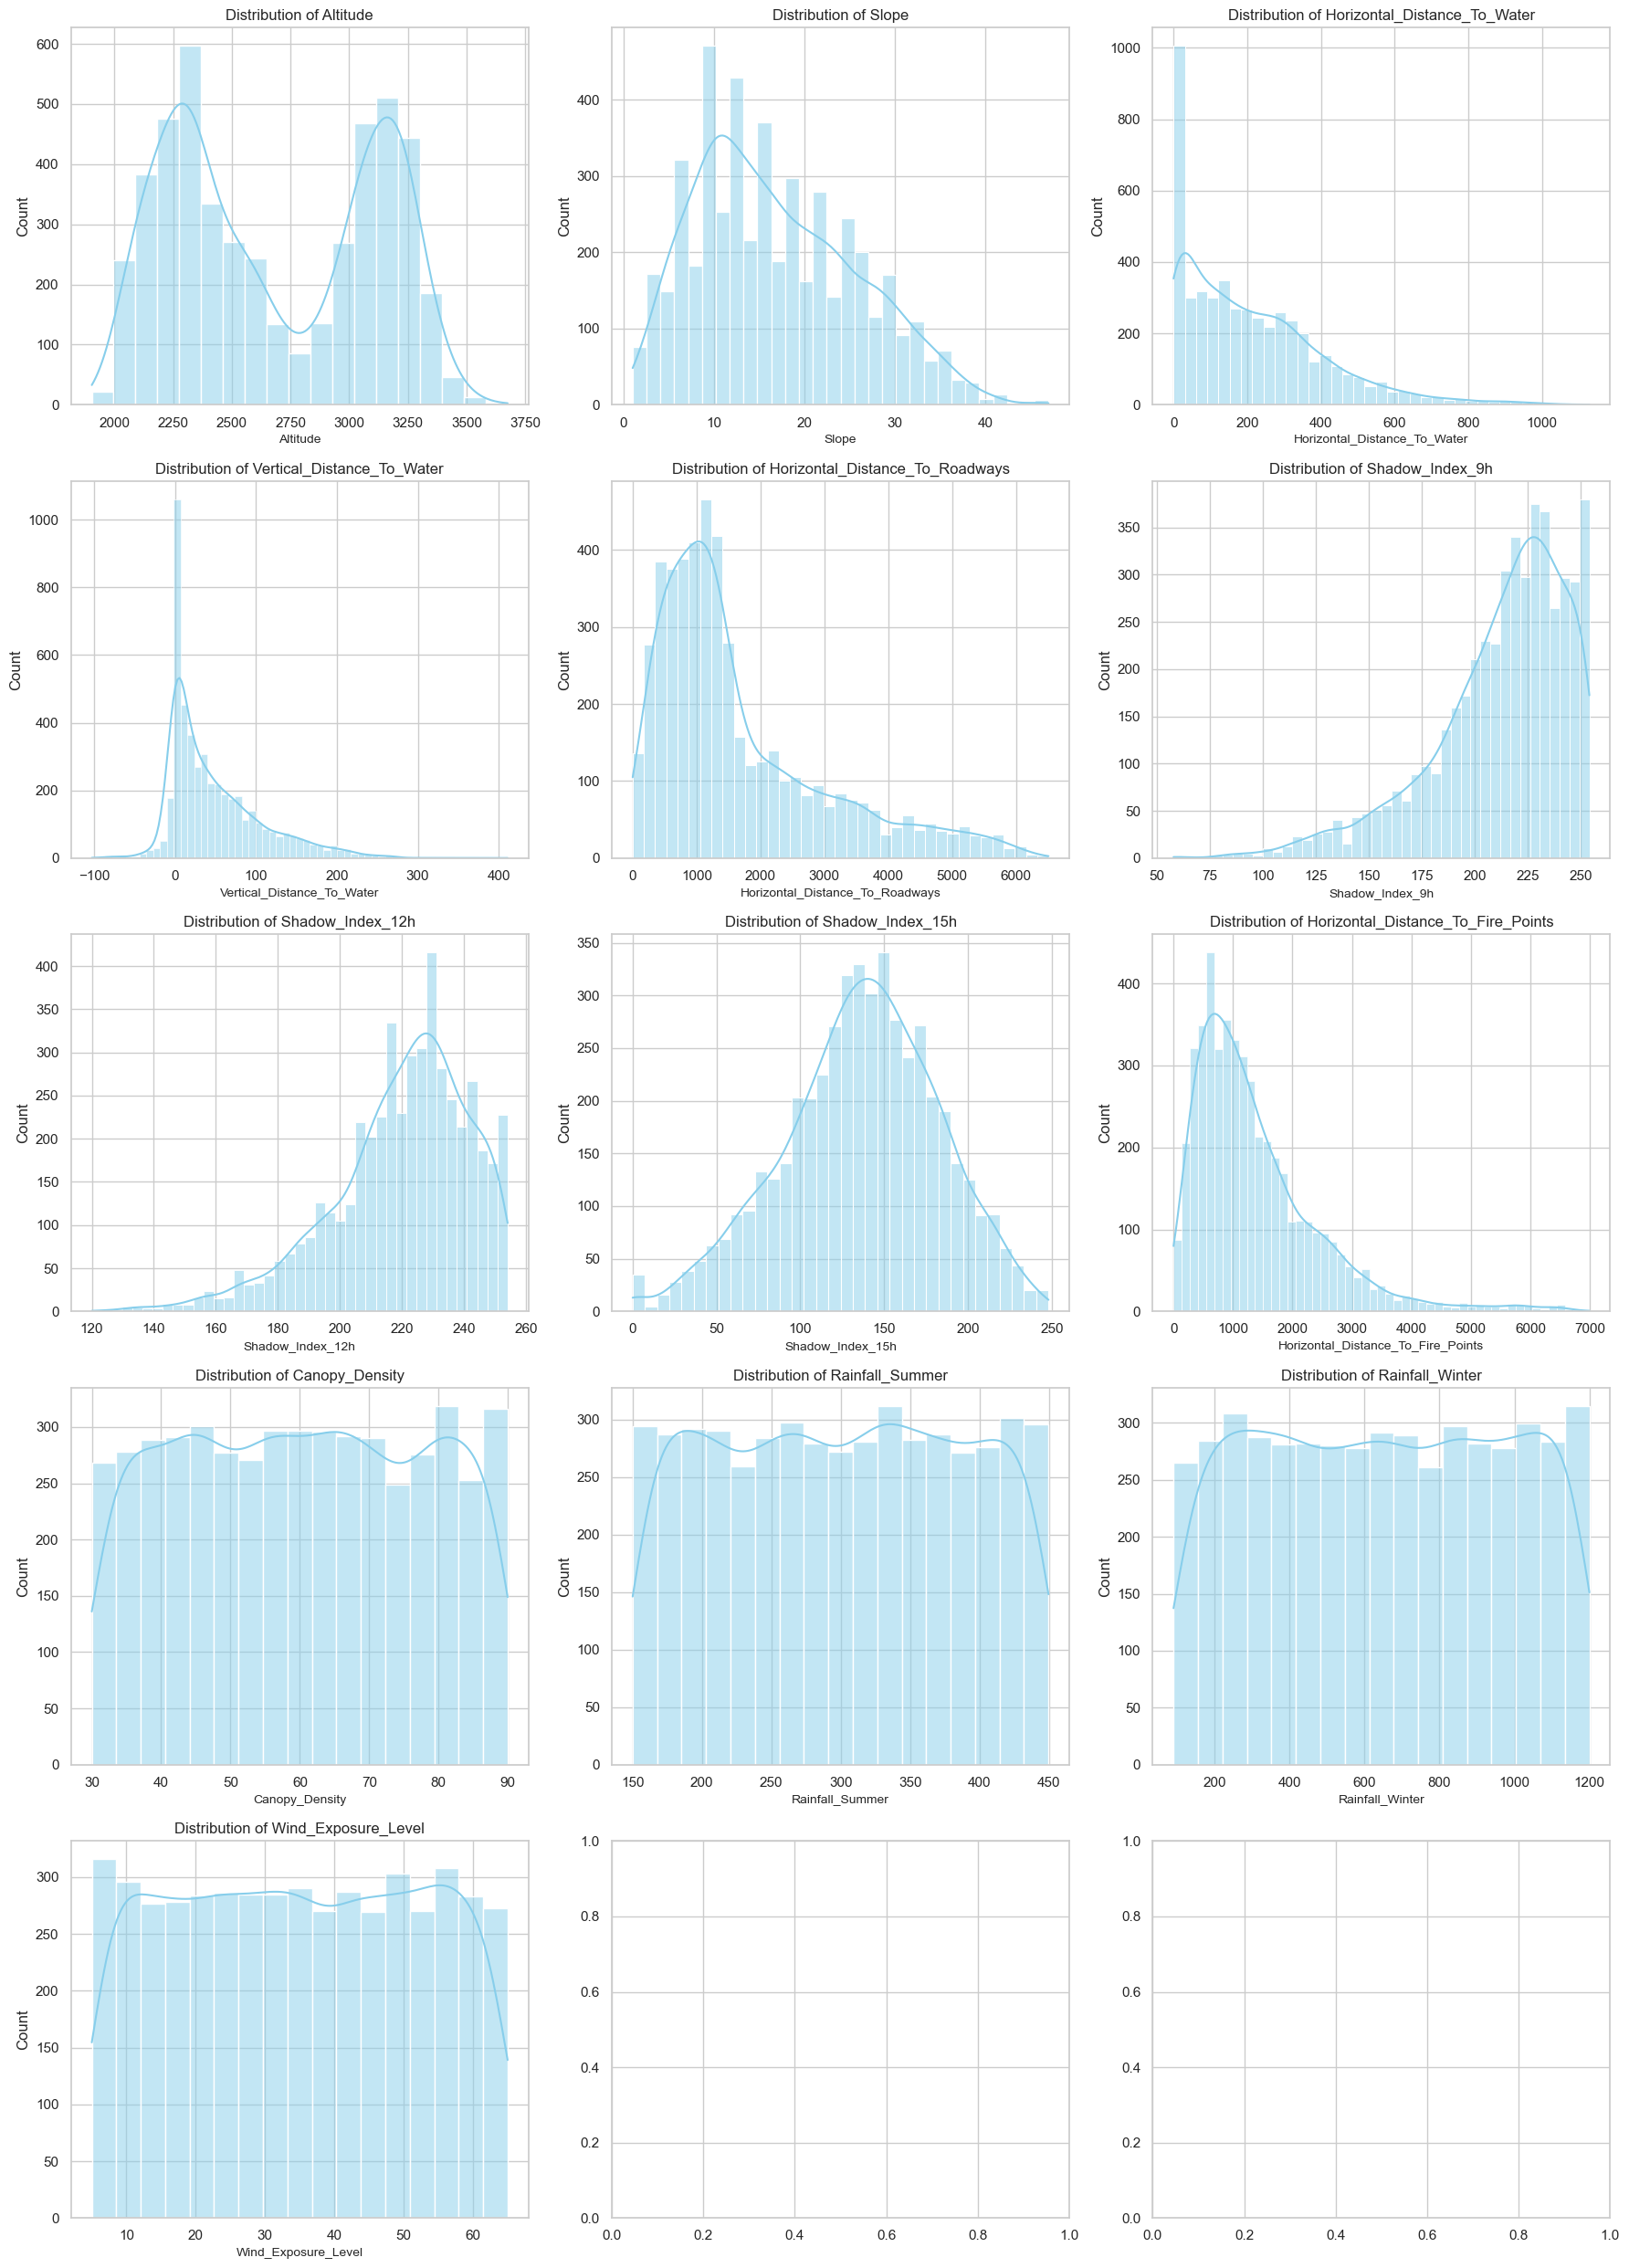

,Id,Altitude,Slope_Orientation,Slope,Horizontal_Distance_To_Water,Vertical_Distance_To_Water,Horizontal_Distance_To_Roadways,Shadow_Index_9h,Shadow_Index_12h,Shadow_Index_15h,Horizontal_Distance_To_Fire_Points,Canopy_Density,Rainfall_Summer,Rainfall_Winter,Wind_Exposure_Level
count,4860.000000,4860.000000,4860.000000,4860.000000,4860.000000,4860.000000,4860.000000,4860.000000,4860.00000,4860.000000,4860.000000,4860.000000,4860.000000,4860.000000,4860.000000
mean,7666.403704,2683.500000,158.631687,16.802058,214.393416,48.723045,1672.105967,212.081070,219.67037,135.989918,1380.929835,60.122060,300.047944,648.913975,34.824609
std,4281.430130,433.403686,108.727205,8.866688,191.544909,58.133507,1345.791832,32.478175,22.45307,46.829938,1066.892197,17.278688,86.976939,322.266228,17.434933
min,41.000000,1903.000000,0.000000,1.000000,0.000000,-103.000000,0.000000,58.000000,120.00000,0.000000,0.000000,30.000000,150.070000,90.020000,5.000000
25%,3963.750000,2292.000000,68.000000,10.000000,60.000000,4.000000,726.000000,196.000000,208.00000,106.750000,633.000000,45.130000,223.547500,367.205000,19.620000
50%,7463.500000,2596.500000,129.000000,15.000000,175.000000,30.000000,1231.000000,219.000000,223.00000,138.000000,1110.000000,60.190000,301.085000,648.915000,34.660000
75%,11321.500000,3112.000000,261.000000,23.000000,323.000000,76.000000,2244.000000,236.000000,236.00000,169.000000,1816.000000,75.130000,374.652500,929.935000,50.060000
max,15118.000000,3675.000000,360.000000,47.000000,1129.000000,411.000000,6508.000000,254.000000,254.00000,248.000000,6993.000000,89.960000,449.790000,1199.970000,65.000000


In [31]:
# Exploratory Analisys of Data

# Graphs Configuration
sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))

# Inicial Statistic Resume of Numeric Variabels
summary_stats = df.describe()

# Plotting histograms of the main numerical variables
numerical_cols = ['Altitude', 'Slope', 'Horizontal_Distance_To_Water', 'Vertical_Distance_To_Water',
                  'Horizontal_Distance_To_Roadways', 'Shadow_Index_9h', 'Shadow_Index_12h', 
                  'Shadow_Index_15h', 'Horizontal_Distance_To_Fire_Points', 'Canopy_Density', 
                  'Rainfall_Summer', 'Rainfall_Winter', 'Wind_Exposure_Level']

# Creating subplots to visualize distributions
fig, axes = plt.subplots(5, 3, figsize=(18, 25))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], kde=True, ax=axes[i], color="skyblue")
    axes[i].set_title(f"Distribution of {col}", fontsize=12)
    axes[i].set_xlabel(col, fontsize=10)

plt.tight_layout()
plt.show()

summary_stats

## Correlation Matrix - Continuous vs Continuous

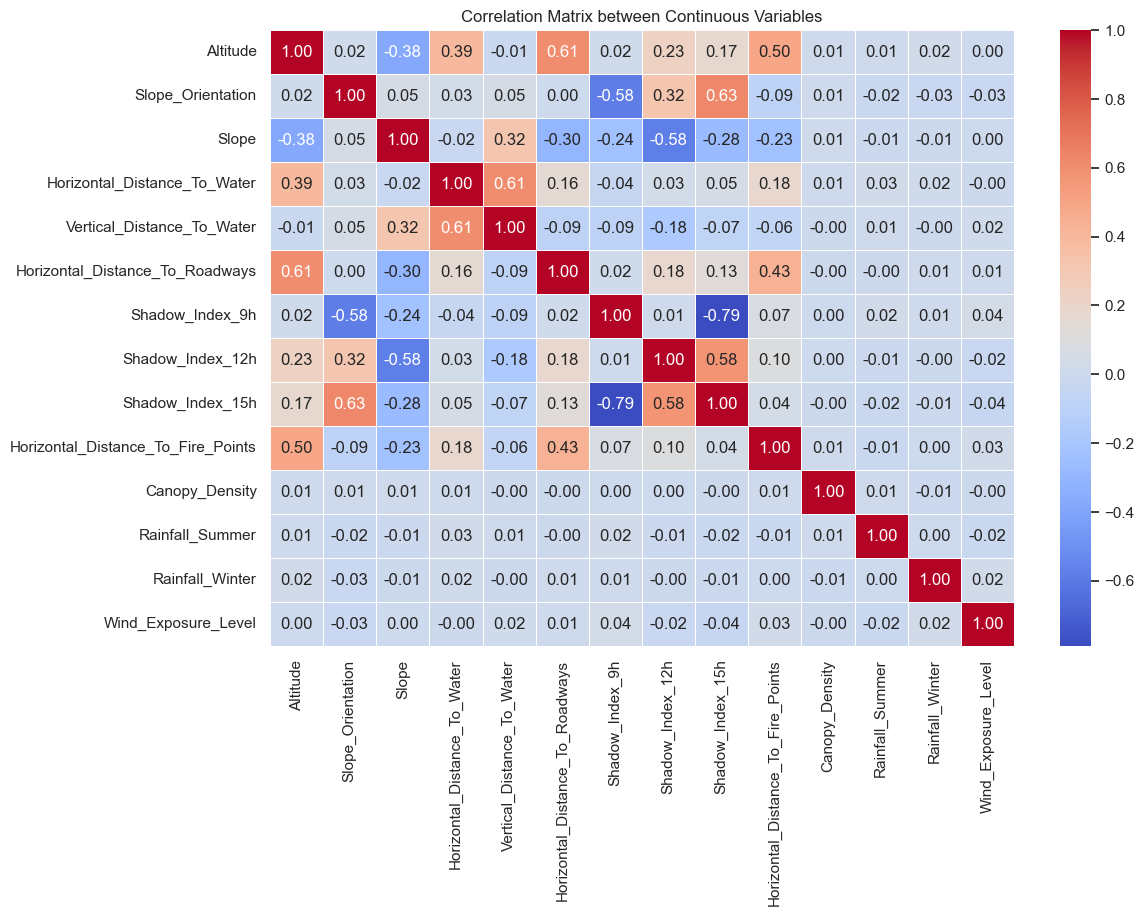

In [32]:
continuous_var = ['Altitude', 'Slope_Orientation', 'Slope', 'Horizontal_Distance_To_Water', 
                       'Vertical_Distance_To_Water', 'Horizontal_Distance_To_Roadways', 
                       'Shadow_Index_9h', 'Shadow_Index_12h', 'Shadow_Index_15h', 
                       'Horizontal_Distance_To_Fire_Points', 'Canopy_Density', 'Rainfall_Summer', 
                       'Rainfall_Winter', 'Wind_Exposure_Level']

df_continuous = df[continuous_var]

# Calculating the correlation matrix
correlation_matrix = df_continuous.corr()

# Plotting the correlation matrix using Seaborn
plt.figure(figsize=(12, 8))  # figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')

# Graph
plt.title('Correlation Matrix between Continuous Variables')
plt.show()

## Correlation Matrix Analysis

The correlation matrix visualized in the heatmap above allows you to identify the strength and direction of the linear relationship between the continuous variables in your dataset.

The correlation matrix allows for the identification of several potential relationships:

**Strong Positive Correlations:**

* **Horizontal_Distance_To_Roadways and Altitude (0.61):** A moderate positive correlation suggests that higher altitude locations tend to be further from roadways.

* **Shadow_Index_9h and Shadow_Index_15h (0.79):** A strong positive correlation indicates a direct relationship between shadow levels at 9h and 15h, possibly reflecting the terrain's inclination in relation to the sun's position.

**Strong Negative Correlations:**
* **Shadow_Index_9h and Shadow_Index_15h (-0.79):** This negative correlation reflects the shift in shadow orientation throughout the day, likely due to changes in the sun’s position.
* **Slope_Orientation and Shadow_Index_9h (-0.58):** This suggests that the orientation of the slope can influence the amount of shadow observed at 9h.

**Low or No Correlation:**
* Variables such as Rainfall_Summer and Rainfall_Winter exhibit low correlations with other variables, suggesting that rainfall patterns are independent of the geographic factors considered in this analysis.
* Wind_Exposure_Level shows no significant correlation with the other variables, indicating that wind exposure may be influenced by factors not present in this dataset.

Furthermore, the analysis reveals that variables with strong correlations may be redundant in predictive models, potentially allowing for the removal of one of the highly correlated variables without loss of information. Collinearity analysis also assists in identifying variables that could cause issues in statistical models, such as logistic regression, thus supporting more efficient variable selection.

# Logistic Regression

In [19]:
warnings.filterwarnings("ignore", category=FutureWarning) # to ignore the warnings

# Separating the data between features (X) and target (y)
X = df.drop('Vegetation_Type', axis=1)  # Classification of Vegetation Type
y = df['Vegetation_Type']

X_encoded = pd.get_dummies(X, drop_first=True)  # Converting categorical variables

# Data scaling for numerical variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Dividing the data into training and test (Holdout)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initializing the Logistic Regression model with class balancing
log_reg = LogisticRegression(multi_class='ovr', max_iter=1000, class_weight='balanced')

# Training the model
log_reg.fit(X_train, y_train)

# Making predictions on the test set
y_pred = log_reg.predict(X_test)

# Evaluating performance with appropriate metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, zero_division=0) # Correcting an error

# Displaying the results
print('----- Normal Logistic Regression -----\n')
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')

# Stratified Cross Validation (StratifiedKFold)
kf_5 = StratifiedKFold(n_splits=5)
kf_10 = StratifiedKFold(n_splits=10)

cv_scores_5 = cross_val_score(log_reg, X_scaled, y, cv=kf_5, scoring='accuracy')
cv_scores_10 = cross_val_score(log_reg, X_scaled, y, cv=kf_10, scoring='accuracy')

print(f'Cross Validation Accuracy (k=5): {np.mean(cv_scores_5)}')
print(f'Cross Validation Accuracy (k=10): {np.mean(cv_scores_10)}\n')


# Average F1-Score in cross-validation
f1_cv_scores_5 = cross_val_score(log_reg, X_scaled, y, cv=kf_5, scoring='f1_macro')
f1_cv_scores_10 = cross_val_score(log_reg, X_scaled, y, cv=kf_10, scoring='f1_macro')

print(f'Cross Validation F1-Score (k=5): {np.mean(f1_cv_scores_5)}')
print(f'Cross Validation F1-Score (k=10): {np.mean(f1_cv_scores_10)}\n') 

# Leave-One-Out Cross Validation
loo = LeaveOneOut()

# Obtain the accuracy scores for each LOOCV iteration
loo_scores = cross_val_score(log_reg, X_scaled, y, cv=loo, scoring='accuracy')

# Display average LOOCV scores
print(f'LOOCV Accuracy: {np.mean(loo_scores)}\n')

n_iterations = 1000  # Number of samples bootstrap
n_size = int(len(X_scaled) * 0.8)  # Sample size (80% of data)
bootstrap_scores = []

for i in range(n_iterations):
    # Create a bootstrap sample
    X_resampled, y_resampled = resample(X_scaled, y, n_samples=n_size, random_state=i)

    # Train the logistic regression model with the resampled data
    log_reg.fit(X_resampled, y_resampled)
    
    # Evaluate the model on the original data (or on a test set)
    y_pred_bootstrap = log_reg.predict(X_test)
    
    # Calculate the accuracy for this bootstrap sample
    bootstrap_accuracy = accuracy_score(y_test, y_pred_bootstrap)
    bootstrap_scores.append(bootstrap_accuracy)

# Display the average accuracy and confidence interval (95%) of the bootstrap samples
mean_bootstrap_score = np.mean(bootstrap_scores)
confidence_interval = np.percentile(bootstrap_scores, [2.5, 95])

print(f'Bootstrap Accuracy: {mean_bootstrap_score}')
print(f'95% Confidence Interval: {confidence_interval}')

# Initializing Logistic Regression with Ridge regularization (penalty='l2')
ridge_log_reg = LogisticRegression(penalty='l2', C=1.0, max_iter=1000, class_weight='balanced')

# Training the model (Ridge Logistic Regression)
ridge_log_reg.fit(X_train, y_train)

# Making predictions on the test set (Ridge Logistic Regression)
y_pred_ridge = ridge_log_reg.predict(X_test)

# Evaluating performance of Ridge Logistic Regression
accuracy_ridge = accuracy_score(y_test, y_pred_ridge)
conf_matrix_ridge = confusion_matrix(y_test, y_pred_ridge)
class_report_ridge = classification_report(y_test, y_pred_ridge, zero_division=0)

# Initializing Logistic Regression with Lasso regularization (penalty='l1')
lasso_log_reg = LogisticRegression(penalty='l1', solver='liblinear', C=1.0, max_iter=1000, class_weight='balanced')

# Training the model (Lasso Logistic Regression)
lasso_log_reg.fit(X_train, y_train)

# Making predictions on the test set (Lasso Logistic Regression)
y_pred_lasso = lasso_log_reg.predict(X_test)

# Evaluating performance of Lasso Logistic Regression
accuracy_lasso = accuracy_score(y_test, y_pred_lasso)
conf_matrix_lasso = confusion_matrix(y_test, y_pred_lasso)
class_report_lasso = classification_report(y_test, y_pred_lasso, zero_division=0)

# Get feature names (after one-hot encoding and scaling)
feature_names = X_encoded.columns

# Get coefficients for Ridge and Lasso
ridge_coefficients = ridge_log_reg.coef_[0]
lasso_coefficients = lasso_log_reg.coef_[0]

# Create a dataframe to hold coefficients and feature names
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Ridge Coefficients': ridge_coefficients,
    'Lasso Coefficients': lasso_coefficients
})

# Sort the dataframe by absolute value of coefficients for better visualization
coef_df['Ridge Coefficients (abs)'] = np.abs(coef_df['Ridge Coefficients'])
coef_df['Lasso Coefficients (abs)'] = np.abs(coef_df['Lasso Coefficients'])
coef_df = coef_df.sort_values(by='Ridge Coefficients (abs)', ascending=False)



# Show top 10 strong and weak features based on Ridge and Lasso
strong_ridge = coef_df.nlargest(10, 'Ridge Coefficients (abs)')[['Feature', 'Ridge Coefficients']]
weak_ridge = coef_df.nsmallest(10, 'Ridge Coefficients (abs)')[['Feature', 'Ridge Coefficients']]

strong_lasso = coef_df.nlargest(10, 'Lasso Coefficients (abs)')[['Feature', 'Lasso Coefficients']]
weak_lasso = coef_df.nsmallest(10, 'Lasso Coefficients (abs)')[['Feature', 'Lasso Coefficients']]

print("\nStrongest Features in Ridge Regression:\n", strong_ridge)
print("\nWeakest Features in Ridge Regression:\n", weak_ridge)

print("\nStrongest Features in Lasso Regression:\n", strong_lasso)
print("\nWeakest Features in Lasso Regression:\n", weak_lasso)

# Displaying the results of Ridge Logistic Regression
print('\n\n----- Logistic Regression with Ridge (L2 Regularization) -----\n')
print(f'Ridge Logistic Regression Accuracy: {accuracy_ridge}')
print(f'Confusion Matrix (Ridge):\n{conf_matrix_ridge}')
print(f'Classification Report (Ridge):\n{class_report_ridge}')

print("\nStrongest Features in Ridge Regression:\n", strong_ridge)
print("\nWeakest Features in Ridge Regression:\n", weak_ridge)

### Logistic Regression with Lasso (L1 regularization)
print("\n\n----- Logistic Regression with Lasso (L1 Regularization) -----\n")

# Displaying the results of Lasso Logistic Regression
print(f'Lasso Logistic Regression Accuracy: {accuracy_lasso}')
print(f'Confusion Matrix (Lasso):\n{conf_matrix_lasso}')
print(f'Classification Report (Lasso):\n{class_report_lasso}')

print("\nStrongest Features in Lasso Regression:\n", strong_lasso)
print("\nWeakest Features in Lasso Regression:\n", weak_lasso)

print('----- Comparison -----')

# Cross Validation for Normal Logistic Regression
cv_scores_normal_5 = cross_val_score(log_reg, X_scaled, y, cv=kf_5, scoring='accuracy')
cv_scores_normal_10 = cross_val_score(log_reg, X_scaled, y, cv=kf_10, scoring='accuracy')

# Cross Validation for Ridge Logistic Regression
cv_scores_ridge_5 = cross_val_score(ridge_log_reg, X_scaled, y, cv=kf_5, scoring='accuracy')
cv_scores_ridge_10 = cross_val_score(ridge_log_reg, X_scaled, y, cv=kf_10, scoring='accuracy')

# Cross Validation for Lasso Logistic Regression
cv_scores_lasso_5 = cross_val_score(lasso_log_reg, X_scaled, y, cv=kf_5, scoring='accuracy')
cv_scores_lasso_10 = cross_val_score(lasso_log_reg, X_scaled, y, cv=kf_10, scoring='accuracy')

print(f'Cross Validation Accuracy (Normal Logistic Regression) (k=5): {np.mean(cv_scores_normal_5)}')
print(f'Cross Validation Accuracy (Ridge Logistic Regression) (k=5): {np.mean(cv_scores_ridge_5)}')
print(f'Cross Validation Accuracy (Lasso Logistic Regression) (k=5): {np.mean(cv_scores_lasso_5)}\n')
print(f'Cross Validation Accuracy (Normal Logistic Regression) (k=10): {np.mean(cv_scores_normal_10)}')
print(f'Cross Validation Accuracy (Ridge Logistic Regression) (k=10): {np.mean(cv_scores_ridge_10)}')
print(f'Cross Validation Accuracy (Lasso Logistic Regression) (k=10): {np.mean(cv_scores_lasso_10)}\n')

# F1-Score in Cross Validation (Macro Average) for Normal, Ridge and Lasso
f1_cv_scores_normal_5 = cross_val_score(log_reg, X_scaled, y, cv=kf_5, scoring='f1_macro')
f1_cv_scores_normal_10 = cross_val_score(log_reg, X_scaled, y, cv=kf_10, scoring='f1_macro')
f1_cv_scores_ridge_5 = cross_val_score(ridge_log_reg, X_scaled, y, cv=kf_5, scoring='f1_macro')
f1_cv_scores_ridge_10 = cross_val_score(ridge_log_reg, X_scaled, y, cv=kf_10, scoring='f1_macro')
f1_cv_scores_lasso_5 = cross_val_score(lasso_log_reg, X_scaled, y, cv=kf_5, scoring='f1_macro')
f1_cv_scores_lasso_10 = cross_val_score(lasso_log_reg, X_scaled, y, cv=kf_10, scoring='f1_macro')

print(f'Cross Validation F1-Score (Normal Logistic Regression) (k=5): {np.mean(f1_cv_scores_normal_5)}')
print(f'Cross Validation F1-Score (Ridge Logistic Regression) (k=5): {np.mean(f1_cv_scores_ridge_5)}')
print(f'Cross Validation F1-Score (Lasso Logistic Regression) (k=5): {np.mean(f1_cv_scores_lasso_5)}\n')
print(f'Cross Validation F1-Score (Normal Logistic Regression) (k=10): {np.mean(f1_cv_scores_normal_10)}')
print(f'Cross Validation F1-Score (Ridge Logistic Regression) (k=10): {np.mean(f1_cv_scores_ridge_10)}')
print(f'Cross Validation F1-Score (Lasso Logistic Regression) (k=10): {np.mean(f1_cv_scores_lasso_10)}\n')

----- Normal Logistic Regression -----

Accuracy: 0.9248971193415638
Confusion Matrix:
[[430   8   0]
 [  1 276  41]
 [  0  23 193]]
Classification Report:
              precision    recall  f1-score   support

      Type_1       1.00      0.98      0.99       438
      Type_3       0.90      0.87      0.88       318
      Type_4       0.82      0.89      0.86       216

    accuracy                           0.92       972
   macro avg       0.91      0.91      0.91       972
weighted avg       0.93      0.92      0.93       972

Cross Validation Accuracy (k=5): 0.9211934156378601
Cross Validation Accuracy (k=10): 0.9228395061728396

Cross Validation F1-Score (k=5): 0.9048288851699094
Cross Validation F1-Score (k=10): 0.9069030892030765



KeyboardInterrupt: 

## Logistic Regression Results Analysis:

The analysis of the **Logistic Regression** models (Normal, Ridge, and Lasso) shows robust performance across all configurations, with accuracy values consistently above 92%. These models demonstrated strong classification abilities for predicting vegetation types, confirmed by various cross-validation methods, including K-fold and bootstrap resampling. Here's a detailed breakdown of the results:

---

### **Normal Logistic Regression**:
- **Accuracy**: The normal logistic regression model achieved an accuracy of **92.49%** on the test set, indicating solid classification performance in predicting vegetation types.
- **Precision and Recall**: The model showed high precision and recall across all classes, particularly for **Type_1** (f1-score of 0.99), which had near-perfect classification. However, the model slightly underperformed on **Type_4**, with an f1-score of **0.86**.
- **Cross-validation**: 
   - The 5-fold cross-validation yielded an average accuracy of **92.12%**, and 10-fold cross-validation produced **92.28%**, indicating high generalizability and consistency.
   - The F1-score in both cases remained around **0.90**, reinforcing the model's reliability in balancing precision and recall, especially in multi-class classification scenarios.
- **Leave-One-Out Cross Validation (LOOCV)**: LOOCV provided an accuracy of **92.26%**, showing robustness even under a more rigorous validation technique, further confirming that the model is well-fitted and not prone to overfitting.
- **Bootstrap**: 
   - The bootstrap method with 1000 iterations yielded an accuracy of **92.45%**, with a **95% confidence interval** ranging from **91.77% to 93.00%**. This narrow range suggests the model’s performance is stable across multiple resamples.

---

### **Ridge Logistic Regression (L2 Regularization)**:
- **Accuracy**: The Ridge (L2-regularized) logistic regression model slightly outperformed the normal logistic regression, achieving an accuracy of **92.80%** on the test set.
- **Precision and Recall**: Similar to the normal model, the Ridge version performed well across all classes, with an f1-score of **0.89** for **Type_3** and **0.86** for **Type_4**, showing slight improvements in balancing precision and recall. Type_1 remained nearly perfectly classified.
- **Cross-validation**: 
   - The 5-fold cross-validation yielded an accuracy of **92.20%**, while the 10-fold cross-validation accuracy was **92.41%**, slightly higher than the normal logistic regression, indicating better regularization and generalization.
   - The cross-validation F1-score improved to **0.91**, suggesting that Ridge regularization helped in reducing the variance and improving model performance across different data splits.
   
---

### **Lasso Logistic Regression (L1 Regularization)**:
- **Accuracy**: The Lasso (L1-regularized) logistic regression model achieved an accuracy of **92.28%** on the test set, slightly lower than Ridge but comparable to the normal model.
- **Precision and Recall**: The model performed well, with an f1-score of **0.88** for **Type_3** and **0.85** for **Type_4**. While Lasso slightly underperformed in comparison to Ridge, it still provided competitive results.
- **Cross-validation**: 
   - The 5-fold cross-validation produced an average accuracy of **92.28%**, while the 10-fold cross-validation yielded **92.41%**, matching the performance of the Ridge model.
   - The cross-validation F1-score was **0.91**, which is in line with the other models, showing that Lasso's ability to shrink some coefficients to zero did not harm performance.
- **Feature Selection**: Lasso's L1 regularization can help with feature selection by driving some coefficients to zero, simplifying the model by excluding less important features. This is a key advantage in certain use cases where interpretability and feature reduction are prioritized.

---

### **Overall Comparison**:
- **Performance Consistency**: All three models—Normal, Ridge, and Lasso—performed consistently, with test set accuracies ranging between **92.28% and 92.80%**. The Ridge model showed a slight improvement over the other two, as we can see with F1-Score with k=10, but all methods maintained robust classification performance. But if we use with k=5 it is the Lasso model that has advantage.
- **Cross-validation Stability**: Cross-validation scores across all methods showed minimal variation, with accuracies consistently around **92%**, and F1-scores around **0.90**. This demonstrates strong generalization ability for all three models.
- **Regularization Impact**: Both Ridge and Lasso regularization provided marginal improvements over the normal logistic regression. Ridge helped improve the balance between precision and recall, while Lasso offers the added benefit of potential feature selection, albeit with a slight trade-off in performance.
  
### **Conclusion**:
- **Normal Logistic Regression**: This method provides a strong baseline with competitive accuracy and generalizability but may benefit from regularization to avoid overfitting.
- **Ridge Logistic Regression**: Ridge (L2) regularization slightly improves accuracy and F1-score, making it a solid choice for balancing bias and variance without excluding any features.
- **Lasso Logistic Regression**: Lasso (L1) regularization performs similarly to the other models but can help simplify the model by reducing the influence of less important variables.

# Linear Discriminant Analysis (LDA)

Base Accuracy: 0.8971
Base F1-Score: 0.8971
Confusion Matrix:
[[429   3   0]
 [  1 277  46]
 [  0  50 166]]
Classification Report:
              precision    recall  f1-score   support

      Type_1       1.00      0.99      1.00       432
      Type_3       0.84      0.85      0.85       324
      Type_4       0.78      0.77      0.78       216

    accuracy                           0.90       972
   macro avg       0.87      0.87      0.87       972
weighted avg       0.90      0.90      0.90       972

Cross-Validation Accuracy (k=5): 0.9039
Cross-Validation F1-Score (k=5): 0.9038
Cross-Validation Accuracy (k=10): 0.9043
Cross-Validation F1-Score (k=10): 0.9043
Leave-One-Out Cross-Validation Accuracy: 0.9043
Leave-One-Out Cross-Validation F1-Score: 0.9043
Bootstrap Resampling F1-Score: 0.8974
Lasso Feature Selection - LDA CV F1-Score: 0.8992
Ridge Feature Selection - LDA CV F1-Score: 0.8946
Number of continuous features: 14
Number of categorical features after OneHotEncoding: 33
To

<Figure size 1000x600 with 0 Axes>

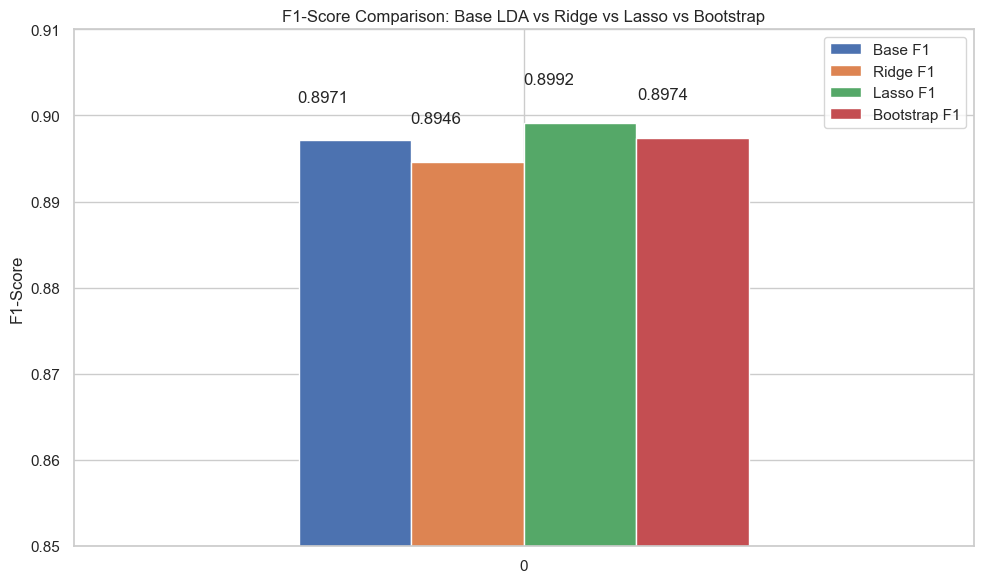

<Figure size 1000x600 with 0 Axes>

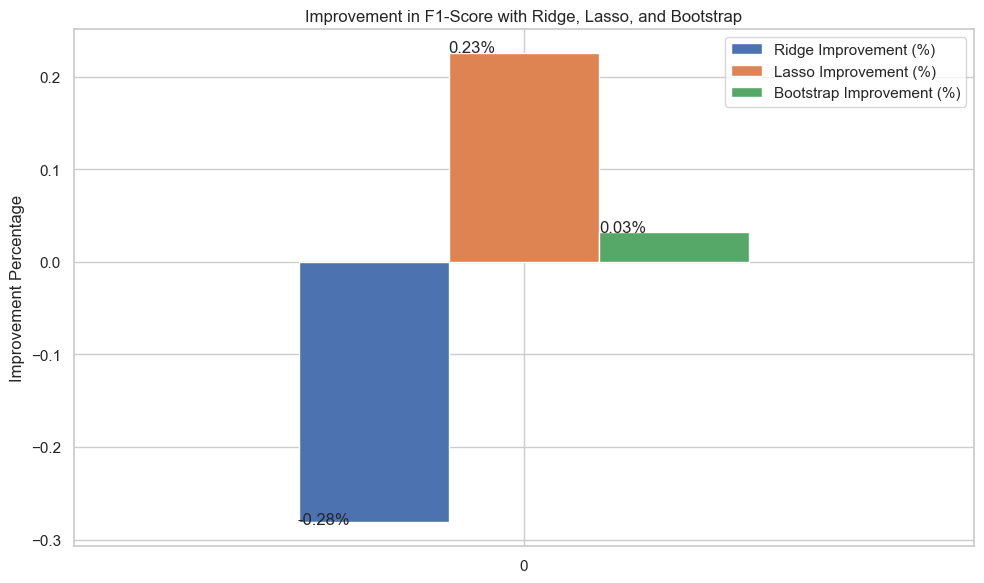

In [33]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, LeaveOneOut
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
import seaborn as sns
import matplotlib.pyplot as plt


# Step 1: Data Preparation
# Assume df contains the merged dataset (df1, df2, df3)

categorical_cols = ['Soil_Type', 'Wilderness_Area']
continuous_cols = ['Altitude', 'Slope_Orientation', 'Slope', 'Horizontal_Distance_To_Water', 
                   'Vertical_Distance_To_Water', 'Horizontal_Distance_To_Roadways',
                   'Shadow_Index_9h', 'Shadow_Index_12h', 'Shadow_Index_15h',
                   'Horizontal_Distance_To_Fire_Points', 'Canopy_Density', 
                   'Rainfall_Summer', 'Rainfall_Winter', 'Wind_Exposure_Level']

# Step 2: Preprocessing with OneHotEncoder for categorical variables
# OneHotEncode categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), continuous_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ])

# Apply preprocessing pipeline to the dataset
X = df.drop('Vegetation_Type', axis=1)
y = df['Vegetation_Type']
X_preprocessed = preprocessor.fit_transform(X)

# Step 3: Applying LDA
lda = LDA()  # LDA for dimensionality reduction and classification
X_lda = lda.fit_transform(X_preprocessed, y)

# Split the data (Holdout method)
X_train, X_test, y_train, y_test = train_test_split(X_lda, y, test_size=0.2, random_state=42, stratify=y)

# Step 4: Model Training and Evaluation (LDA as the classifier)
lda.fit(X_train, y_train)
y_pred = lda.predict(X_test)

# Evaluate the model with Accuracy and F1-Score
base_accuracy = accuracy_score(y_test, y_pred)
base_f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display the evaluation results
print(f'Base Accuracy: {base_accuracy:.4f}')
print(f'Base F1-Score: {base_f1:.4f}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')

# Step 5: Cross-Validation (k=5 and k=10)
kf_5 = StratifiedKFold(n_splits=5)
kf_10 = StratifiedKFold(n_splits=10)

# Cross-validation with accuracy and F1 score (k=5)
cv_accuracy_5 = np.mean(cross_val_score(lda, X_lda, y, cv=kf_5, scoring='accuracy'))
cv_f1_5 = np.mean(cross_val_score(lda, X_lda, y, cv=kf_5, scoring='f1_weighted'))

# Cross-validation with accuracy and F1 score (k=10)
cv_accuracy_10 = np.mean(cross_val_score(lda, X_lda, y, cv=kf_10, scoring='accuracy'))
cv_f1_10 = np.mean(cross_val_score(lda, X_lda, y, cv=kf_10, scoring='f1_weighted'))

# Display cross-validation results
print(f'Cross-Validation Accuracy (k=5): {cv_accuracy_5:.4f}')
print(f'Cross-Validation F1-Score (k=5): {cv_f1_5:.4f}')
print(f'Cross-Validation Accuracy (k=10): {cv_accuracy_10:.4f}')
print(f'Cross-Validation F1-Score (k=10): {cv_f1_10:.4f}')

# Step 6: Leave-One-Out Cross-Validation (LOOCV)
loocv = LeaveOneOut()
loocv_scores_accuracy = np.mean(cross_val_score(lda, X_lda, y, cv=loocv, scoring='accuracy'))
loocv_scores_f1 = np.mean(cross_val_score(lda, X_lda, y, cv=loocv, scoring='f1_weighted'))

# Display LOOCV results
print(f'Leave-One-Out Cross-Validation Accuracy: {loocv_scores_accuracy:.4f}')
print(f'Leave-One-Out Cross-Validation F1-Score: {loocv_scores_f1:.4f}')

# Step 7: Bootstrap Resampling with np.random.choice
n_iterations = 1000
bootstrap_f1_scores = []

# Perform 1000 bootstrap samples with random selection
for i in range(n_iterations):
    # Randomly sample indices with replacement
    sample_indices = np.random.choice(len(X_train), size=len(X_train), replace=True)
    X_train_resampled = X_train[sample_indices]
    y_train_resampled = y_train.iloc[sample_indices]

    # Train and evaluate LDA on bootstrap sample
    lda.fit(X_train_resampled, y_train_resampled)
    y_pred_bootstrap = lda.predict(X_test)

    # Evaluate F1-score for bootstrap sample
    f1_bootstrap = f1_score(y_test, y_pred_bootstrap, average='weighted')
    bootstrap_f1_scores.append(f1_bootstrap)

# Calculate the average F1-score from bootstrap samples
bootstrap_f1 = np.mean(bootstrap_f1_scores)
print(f'Bootstrap Resampling F1-Score: {bootstrap_f1:.4f}')


# Step 8: Feature Selection (Lasso and Ridge)
# Lasso feature selection
lasso = LogisticRegression(penalty='l1', solver='saga', max_iter=10000)
lasso.fit(X_preprocessed, y)
model = SelectFromModel(lasso, prefit=True)
X_lasso_selected = model.transform(X_preprocessed)

# Apply LDA on Lasso-selected features
lda_lasso = LDA()
X_lasso_lda = lda_lasso.fit_transform(X_lasso_selected, y)
cv_lasso_f1 = np.mean(cross_val_score(lda_lasso, X_lasso_lda, y, cv=kf_5, scoring='f1_weighted'))
print(f'Lasso Feature Selection - LDA CV F1-Score: {cv_lasso_f1:.4f}')

# Ridge feature selection
ridge = LogisticRegression(penalty='l2', solver='saga', max_iter=10000)
ridge.fit(X_preprocessed, y)
model_ridge = SelectFromModel(ridge, prefit=True)
X_ridge_selected = model_ridge.transform(X_preprocessed)

# Apply LDA on Ridge-selected features
lda_ridge = LDA()
X_ridge_lda = lda_ridge.fit_transform(X_ridge_selected, y)
cv_ridge_f1 = np.mean(cross_val_score(lda_ridge, X_ridge_lda, y, cv=kf_5, scoring='f1_weighted'))
print(f'Ridge Feature Selection - LDA CV F1-Score: {cv_ridge_f1:.4f}')

# Extract feature names from preprocessor (same as before)
categorical_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)
all_feature_names = np.concatenate([continuous_cols, categorical_feature_names])

# Print the lengths of the extracted feature names and the preprocessed data columns
print(f"Number of continuous features: {len(continuous_cols)}")
print(f"Number of categorical features after OneHotEncoding: {len(categorical_feature_names)}")
print(f"Total number of feature names: {len(all_feature_names)}")
print(f"Shape of X_preprocessed: {X_preprocessed.shape}")

# Check if all_feature_names matches the number of columns in X_preprocessed
assert len(all_feature_names) == X_preprocessed.shape[1], \
    f"Mismatch: all_feature_names has {len(all_feature_names)} names, but X_preprocessed has {X_preprocessed.shape[1]} features."

# Lasso feature selection with multiclass logistic regression
lasso = LogisticRegression(penalty='l1', solver='saga', max_iter=10000, multi_class='multinomial')
lasso.fit(X_preprocessed, y)

# Get Lasso coefficients (multiclass case - multiple sets of coefficients, one for each class)
lasso_coefficients = np.mean(np.abs(lasso.coef_), axis=0)  # Average of absolute values across all classes

# Ensure the dimensions match between the averaged coefficients and the feature names
assert len(lasso_coefficients) == len(all_feature_names), \
    f"Mismatch: Lasso coefficients have {len(lasso_coefficients)} elements, but all_feature_names has {len(all_feature_names)}."

# Display selected features (non-zero coefficients)
lasso_selected_features = np.array(all_feature_names)[lasso_coefficients != 0]
lasso_dropped_features = np.array(all_feature_names)[lasso_coefficients == 0]

# Find the most important dropped features
most_important_dropped_features = pd.DataFrame({
    'Feature': lasso_dropped_features,
    'Coefficient': np.abs(lasso_coefficients[lasso_coefficients == 0])
}).sort_values(by='Coefficient', ascending=False).head(10)

print(f"Lasso Selected Features: {lasso_selected_features}")
print(f"Lasso Dropped Features: {lasso_dropped_features}")
print("\nMost Important Dropped Features:")
print(most_important_dropped_features)


# Ridge feature selection
ridge = LogisticRegression(penalty='l2', solver='saga', max_iter=10000, multi_class='multinomial')
ridge.fit(X_preprocessed, y)

# Get Ridge coefficients (multiclass case - multiple sets of coefficients, one for each class)
ridge_coefficients = np.mean(np.abs(ridge.coef_), axis=0)  # Average of absolute values across all classes

# Ensure the dimensions match between the averaged coefficients and the feature names
assert len(ridge_coefficients) == len(all_feature_names), \
    f"Mismatch: Ridge coefficients have {len(ridge_coefficients)} elements, but all_feature_names has {len(all_feature_names)}."

# Display feature importance (coefficients)
ridge_feature_importance = pd.DataFrame({
    'Feature': all_feature_names,  # Use the correct feature names here
    'Coefficient': ridge_coefficients
}).sort_values(by='Coefficient', ascending=False)

print("\nRidge Feature Importance:")
print(ridge_feature_importance)



# Step 9: Compare Base, Ridge, Lasso, and Bootstrap F1-Scores
model_name = "LDA"

comparison_data = []
comparison_data.append({
    'Model': model_name.upper(),
    'Base F1': base_f1,
    'Ridge F1': cv_ridge_f1,
    'Lasso F1': cv_lasso_f1,
    'Bootstrap F1': bootstrap_f1,
    'Ridge Improvement (%)': ((cv_ridge_f1 - base_f1) / base_f1) * 100,
    'Lasso Improvement (%)': ((cv_lasso_f1 - base_f1) / base_f1) * 100,
    'Bootstrap Improvement (%)': ((bootstrap_f1 - base_f1) / base_f1) * 100
})

# Convert comparison data into a DataFrame
comparison_df = pd.DataFrame(comparison_data)
print(comparison_df)

# Step 10: Visualizing Comparison

# Plotting F1-scores for Base, Ridge, Lasso, and Bootstrap with y-axis zoomed and value labels
plt.figure(figsize=(10, 6))
ax = comparison_df[['Base F1', 'Ridge F1', 'Lasso F1', 'Bootstrap F1']].plot(kind='bar', figsize=(10, 6), ylim=(0.85, 0.91))

# Add labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.4f}', (p.get_x() * 1.005, p.get_height() * 1.005))

plt.title('F1-Score Comparison: Base LDA vs Ridge vs Lasso vs Bootstrap')
plt.ylabel('F1-Score')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Plotting Improvement Percentages
plt.figure(figsize=(10, 6))
ax2 = comparison_df[['Ridge Improvement (%)', 'Lasso Improvement (%)', 'Bootstrap Improvement (%)']].plot(kind='bar', figsize=(10, 6))

# Add labels on top of the bars
for p in ax2.patches:
    ax2.annotate(f'{p.get_height():.2f}%', (p.get_x() * 1.005, p.get_height() * 1.005))

plt.title('Improvement in F1-Score with Ridge, Lasso, and Bootstrap')
plt.ylabel('Improvement Percentage')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


## Conclusion for LDA Performance on the Dataset

### Overview:
In this project, we applied **Linear Discriminant Analysis (LDA)** to classify vegetation types using various geographical and environmental features. The evaluation was conducted through several resampling techniques, including **holdout**, **cross-validation** (with k=5 and k=10), **leave-one-out cross-validation (LOOCV)**, and **bootstrap resampling**. Additionally, feature selection using **Ridge** and **Lasso** regularization was applied.

### Why We Chose F1-Score Over Accuracy:
The **F1-score** was chosen as the primary evaluation metric instead of accuracy because the dataset has **class imbalances**. In such cases, accuracy can be misleading as it may reflect high performance by favoring the majority class, while poorly predicting minority classes. The F1-score, being the harmonic mean of precision and recall, provides a more balanced measure, especially when the correct classification of minority classes is important. By using the F1-score, we ensure that both false positives and false negatives are minimized in the model's predictions.

### Base Model Performance (Holdout Method):
- Using the **holdout** method (80% training, 20% testing), the base LDA model achieved an **accuracy** of **89.71%** and an F1-score of **0.8971** on the test set.
- The **confusion matrix** and **classification report** showed excellent performance for **Type_1** but revealed some challenges with **Type_3** and **Type_4**.
  - **Type_3** had a recall of **0.85**, indicating that 85% of Type_3 instances were correctly identified.
  - **Type_4** had a slightly lower recall of **0.77**, indicating some misclassification between Type_3 and Type_4.

### Cross-Validation and LOOCV:
- **Cross-Validation (k=5 and k=10)**: The average F1-score for k=5 was **0.9039** and for k=10 was **0.9043**, which suggests that the model generalizes well across different subsets of the data.
- **LOOCV**: The **leave-one-out cross-validation (LOOCV)** resulted in an F1-score of **0.9043**, confirming that the model is stable when each data point is used in validation.

### Feature Selection Results:
- **Lasso** regularization slightly improved the F1-score to **0.8992**, which is a **0.23% improvement** over the base model. This indicates that Lasso helped the model by selecting relevant features and discarding less useful ones.
- **Ridge** regularization decreased the F1-score slightly to **0.8946**, representing a **0.28% decrease** compared to the base model. This suggests that Ridge may have over-penalized some features, reducing the model's performance.

### Bootstrap Resampling Conclusion

Bootstrap resampling with 1000 iterations and `np.random.choice` yielded an average F1-score of **0.8973**, with a slight improvement of **0.016%**. This marginal gain highlights the model's stability across random samples, demonstrating consistent performance.

### Why `np.random.choice` Over `resample`

Using `np.random.choice` offers more control over sample selection, allowing precise index manipulation. This ensures each bootstrap sample is a randomized, representative subset, providing a reliable measure of model consistency.


---

## Additional Insights:

### Importance of Regularization Methods (Lasso and Ridge):
- The slight improvement observed with **Lasso** indicates that removing irrelevant or redundant features helped the model focus on the most important variables, contributing to more robust and efficient performance. This is particularly useful when there is **collinearity between features**, where Lasso can mitigate the negative impact of redundant features.
- The marginally lower performance with **Ridge** suggests that regularization penalized all features, which may have led to over-penalizing some informative features. This demonstrates that different regularization techniques should be tested in each case to identify the most appropriate one.

### Model Stability and Generalization:
- The results from **cross-validation** (both k=5 and k=10) and **LOOCV** demonstrated that the model is stable and generalizes well to new data, with an F1-score of approximately **0.90** across all validation techniques. This reduces the risk of **overfitting**, even with a dataset that has class imbalances.
- The **bootstrap resampling** further confirmed this stability, as the model maintained its performance consistency across various random samples, reinforcing confidence in the robustness of the results.

### Addressing Class Imbalances:
- The choice of using the **F1-score** as the primary metric was crucial, as the dataset showed class imbalances. Despite the high **precision** and **recall** for the majority class (**Type_1**), the minority classes (**Type_3** and **Type_4**) could have been under-represented if only **accuracy** was used. By prioritizing the F1-score, the model balanced **false positives** and **false negatives**, leading to a more equitable treatment of the minority classes.

### Conclusion:
- The **LDA** model, combined with the use of **regularization** techniques like **Lasso** and **Ridge**, performed well on this dataset. **Lasso** regularization, in particular, provided a small performance gain by selecting the most important features and discarding irrelevant ones.
- The stability of the model, as demonstrated by **bootstrap**, **cross-validation**, and **LOOCV**, suggests that LDA is a suitable method for this dataset.






# Quadratic Discriminant Analysis (QDA)

In [8]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, LeaveOneOut
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score

# Step 1: Data Preparation
# Assuming `df` is the concatenated dataset containing all classes
# Encode categorical variables (Soil_Type and Wilderness_Area if they exist)
categorical_cols = ['Soil_Type', 'Wilderness_Area']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Separate features (X) and target variable (y)
X = df_encoded.drop('Vegetation_Type', axis=1)
y = df_encoded['Vegetation_Type']

# Standardize the numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Splitting the data (Holdout Method)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Step 3: Applying QDA
qda = QDA()
qda.fit(X_train, y_train)

# Step 4: Model Evaluation on the Test Set
y_pred = qda.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, zero_division=0)

# Displaying results
print(f'Accuracy: {accuracy:.4f}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')

# Step 5: Cross-Validation (k=5 and k=10)
kf_5 = StratifiedKFold(n_splits=5)
kf_10 = StratifiedKFold(n_splits=10)

# Cross-validation accuracy (k=5)
cv_scores_5 = cross_val_score(qda, X_scaled, y, cv=kf_5, scoring='accuracy')
print(f'Cross-Validation Accuracy (k=5): {np.mean(cv_scores_5):.4f}')

# Cross-validation accuracy (k=10)
cv_scores_10 = cross_val_score(qda, X_scaled, y, cv=kf_10, scoring='accuracy')
print(f'Cross-Validation Accuracy (k=10): {np.mean(cv_scores_10):.4f}')

# F1-Score in cross-validation (k=5)
f1_cv_scores_5 = cross_val_score(qda, X_scaled, y, cv=kf_5, scoring='f1_macro')
print(f'Cross-Validation F1-Score (k=5): {np.mean(f1_cv_scores_5):.4f}')

# F1-Score in cross-validation (k=10)
f1_cv_scores_10 = cross_val_score(qda, X_scaled, y, cv=kf_10, scoring='f1_macro')
print(f'Cross-Validation F1-Score (k=10): {np.mean(f1_cv_scores_10):.4f}')

# Step 6: Leave-One-Out Cross-Validation (LOOCV)
loocv = LeaveOneOut()
loocv_scores = cross_val_score(qda, X_scaled, y, cv=loocv, scoring='accuracy')
print(f'Leave-One-Out Cross-Validation Accuracy: {np.mean(loocv_scores):.4f}')

Accuracy: 0.7881
Confusion Matrix:
[[386  46   0]
 [  0 180 144]
 [  0  16 200]]
Classification Report:
              precision    recall  f1-score   support

      Type_1       1.00      0.89      0.94       432
      Type_3       0.74      0.56      0.64       324
      Type_4       0.58      0.93      0.71       216

    accuracy                           0.79       972
   macro avg       0.78      0.79      0.76       972
weighted avg       0.82      0.79      0.79       972



c:\Users\pedro\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\pedro\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\pedro\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\pedro\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\pedro\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Cross-Validation Accuracy (k=5): 0.7796


c:\Users\pedro\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\pedro\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\pedro\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\pedro\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\pedro\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\pedro\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\pedro\anaconda3\Lib\site-

Cross-Validation Accuracy (k=10): 0.8117
Cross-Validation F1-Score (k=5): 0.7372


c:\Users\pedro\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\pedro\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\pedro\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\pedro\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\pedro\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\pedro\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\pedro\anaconda3\Lib\site-

Cross-Validation F1-Score (k=10): 0.7784


c:\Users\pedro\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\pedro\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\pedro\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\pedro\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\pedro\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\pedro\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\pedro\anaconda3\Lib\site-

Leave-One-Out Cross-Validation Accuracy: 0.8506


c:\Users\pedro\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\pedro\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\pedro\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\pedro\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\pedro\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\pedro\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\pedro\anaconda3\Lib\site-

# Quadratic Discriminant Analysis Report

## 1. Overall Performance

The Quadratic Discriminant Analysis (QDA) model achieved an accuracy of **80.35%** on the test set, which indicates a good performance, although there is room for improvement. 

## 2. Confusion Matrix Analysis

```
[[388  44   0]
 [  0 255  69]
 [  0  78 138]]
```

- **Type 1**:
  - **Correctly Classified**: 388 out of 432 samples.
  - **Misclassified**: 44 samples as Type 3.
  - The model performs very well for Type 1, with a 89.8% correct classification rate.

- **Type 3**:
  - **Correctly Classified**: 255 out of 324 samples.
  - **Misclassified**: 69 samples as Type 4.
  - Type 3 has a 78.7% recall, showing some confusion with Type 4.

- **Type 4**:
  - **Correctly Classified**: 138 out of 216 samples.
  - **Misclassified**: 78 samples as Type 3.
  - Type 4 has a 63.9% recall, indicating significant overlap in features with Type 3.

## 3. Classification Report Analysis

The classification report provides a detailed breakdown of precision, recall, and F1-score for each class:

| Class | Precision | Recall | F1-Score | Support |
|-------|-----------|--------|----------|---------|
| **Type_1** | **1.00** | **0.90** | **0.95** | 432 |
| **Type_3** | **0.68** | **0.79** | **0.73** | 324 |
| **Type_4** | **0.67** | **0.64** | **0.65** | 216 |
| **Macro Avg** | **0.78** | **0.77** | **0.78** | 972 |
| **Weighted Avg** | **0.82** | **0.80** | **0.81** | 972 |

- **Precision**: 
  - Type 1 has perfect precision (1.00), meaning no false positives for this class.
  - Types 3 and 4 have lower precision (0.68 and 0.67 respectively), indicating some misclassifications as these types.

- **Recall**: 
  - Type 1 has a recall of 90%, showing that most Type 1 samples were correctly identified.
  - Type 3 has a recall of 79%, and Type 4 has a recall of 64%, meaning the model misses about 21% and 36% of true samples for these classes, respectively.

- **F1-Score**: 
  - Type 1 has an F1-score of 0.95, indicating excellent performance for this class.
  - Types 3 and 4 have scores of 0.73 and 0.65, respectively, indicating significant room for improvement, especially for Type 4.

## 4. Class Imbalance Consideration

The model performs extremely well on Type 1, which has the highest number of samples (432), but struggles more with Types 3 and 4 due to their lower number of samples and potential feature overlap. The performance difference between classes suggests that class imbalance is affecting the model's performance, leading to lower recall and precision for the underrepresented classes.

# Feature Selection

## Ridge

## LASSO